# Clustering Judul Skripsi Menggunakan Metode Self Organizing Map (Studi Kasus: Judul Skripsi Jurusan Sistem Informasi FILKOM UB)

Wilis Biro Syamhuri ----- (175150200111052)
<br>Tuahta Ramadhani ------ (175150219111003)

### Import Library

In [1]:
!pip install sastrawi
import pandas as pd
import numpy as np
from datetime import datetime as time
import seaborn as sns
import TF_IDF as tfidf                                                           # from scratch (kecuali library sastrawi)
import SOM as som                                                                # from scratch
import Silhouette_Coefficient as sc                                              # from scratch

In [2]:
# waktu memulai eksekusi program
start = time.now()

### Data Preparation

In [3]:
data = pd.read_csv('Judul Skripsi JSI.csv')
data_judul = data.loc[0:, "judul_skripsi"]
data_judul_notnull = data_judul[data_judul.notnull()]                            # filter data (null)/(none)/(np.nan)
corpus = data_judul_notnull.values.tolist()
len(corpus), corpus[:5]

(1586,
 ['Pengembangan Sistem Informasi Manajemen Administrasi Perangkat Pembelajaran pada Sekolah Menegah Kejuruan (SMK) Berbasis Web',
  'Pengembangan Sistem Informasi Manajemen Administrasi Perangkat Pembelajaran dan Supervisi Guru pada Sekolah Menengah Kejuruan (SMK)',
  'PENGARUH PROBLEM BASED LEARNING TERHADAP PENINGKATAN HASIL BELAJAR SISWA PADA MATA PELAJARAN KOMPUTER DAN JARINGAN DASAR DI SMK NEGERI 3 MALANG',
  'PEMBANGUNAN SISTEM INFORMASI PERPUSTAKAAN BERBASIS WEB MENGGUNAKAN METODE RAPID APPLICATION DEVELOPMENT (RAD)(STUDI PADA : SMK NEGERI 11 MALANG)',
  'IMPLEMENTASI PEMBELAJARAN DENGAN BANTUAN EDMODO UNTUK MENINGKATKAN KUALITAS INTERAKSI MULTI ARAH ANTARA GURU DAN SISWA PADA MATA PELAJARAN KOMPUTER DAN JARINGAN DASAR\n(STUDI PADA KELAS X JURUSAN TEKNIK KOMPUTER DAN JARINGAN SMK NEGERI 3 MALANG)'])

### Feature Extraction Menggunakan TF-IDF

In [4]:
fitur_tfidf = tfidf.get_tf_idf(corpus, dfTresh=0)
fitur_tfidf.head()

,judul skripsi,kembang,sistem,informasi,manajemen,administrasi,perangkat,ajar,sekolah,tegah,juru,smk,bas,web,supervisi,guru,tengah,pengaruh,problem,based,learning,hadap,tingkat,hasil,siswa,mata,komputer,jaring,dasar,negeri,malang,bangun,pustaka,metode,rapid,application,development,radstudi,implementasi,bantu,...,rent,car,laravel,man,aws,restful,bot,notifikasi,second,database,sql,pondok,minhajurrosyidin,klegen,ekstrakurikuler,calendar,cvgumcode,gateway,sapi,adventure,hymsa,indotraco,rattan,furniture,olap,artikel,jtiik,react,native,bycoffe,luandry,tangkar,kenari,yanies,cookies,kue,dialogflow,kuisoner,talend,virtualization
0,Pengembangan Sistem Informasi Manajemen Admini...,-0.996,-0.812,-0.78,-1.211,-0.502,-1.032,-1.542,-0.784,3.2,0.753,-1.175,-1.146,-1.197,0.0,0.000,0.00,0.000,0.0,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Pengembangan Sistem Informasi Manajemen Admini...,-0.996,-0.812,-0.78,-1.211,-0.502,-1.032,-1.542,-0.784,0.0,0.753,-1.175,0.000,0.000,3.2,-0.356,-0.09,0.000,0.0,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,PENGARUH PROBLEM BASED LEARNING TERHADAP PENIN...,0.000,0.000,0.00,0.000,0.000,0.000,-1.157,0.000,0.0,0.000,-1.175,0.000,0.000,0.0,0.000,0.00,-1.189,0.0,-0.666,-0.941,-1.213,-1.14,-0.856,-1.075,-0.973,-1.203,-0.779,-1.201,-1.159,-1.017,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,PEMBANGUNAN SISTEM INFORMASI PERPUSTAKAAN BERB...,0.000,-0.812,-0.78,0.000,0.000,0.000,0.000,0.000,0.0,0.000,-1.175,-1.146,-1.197,0.0,0.000,0.00,0.000,0.0,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,-1.159,-1.017,-1.075,-0.861,-0.842,2.026,-0.089,-0.356,3.2,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,IMPLEMENTASI PEMBELAJARAN DENGAN BANTUAN EDMOD...,0.000,0.000,0.00,0.000,0.000,0.000,-1.157,0.000,0.0,0.000,-1.175,0.000,0.000,0.0,-0.356,0.00,0.000,0.0,0.000,0.000,0.000,-1.14,0.000,-1.075,-0.973,-0.797,-0.214,-1.201,-1.159,-1.017,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.128,-0.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# dimensi (banyak_data, fitur/term) -> term = term-1
fitur_tfidf.shape

(1586, 3082)

In [6]:
# preparation for clustering
term = fitur_tfidf.columns.tolist().pop(0)
fitur_tfidf = fitur_tfidf.sample(frac=1).reset_index(drop=True)                  # shuffle data

# train -> 75% data
train = fitur_tfidf.iloc[:1189,:].reset_index(drop=True)
judul_train = train['judul skripsi'].tolist()
train_copy = train.copy()
train_copy.drop('judul skripsi', axis=1, inplace=True)
x_train = train_copy.to_numpy()

# test -> 25% data
test = fitur_tfidf.iloc[1189:,:].reset_index(drop=True)
judul_test = test['judul skripsi'].tolist()
test_copy = test.copy()
test_copy.drop('judul skripsi', axis=1, inplace=True)
x_test = test_copy.to_numpy()

test.head()

,judul skripsi,kembang,sistem,informasi,manajemen,administrasi,perangkat,ajar,sekolah,tegah,juru,smk,bas,web,supervisi,guru,tengah,pengaruh,problem,based,learning,hadap,tingkat,hasil,siswa,mata,komputer,jaring,dasar,negeri,malang,bangun,pustaka,metode,rapid,application,development,radstudi,implementasi,bantu,...,rent,car,laravel,man,aws,restful,bot,notifikasi,second,database,sql,pondok,minhajurrosyidin,klegen,ekstrakurikuler,calendar,cvgumcode,gateway,sapi,adventure,hymsa,indotraco,rattan,furniture,olap,artikel,jtiik,react,native,bycoffe,luandry,tangkar,kenari,yanies,cookies,kue,dialogflow,kuisoner,talend,virtualization
0,PERANCANGAN DASHBOARD UNTUK MONITORING DAN EVA...,0.000,0.000,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,PERBAIKAN ANTARMUKA DAN PENGEMBANGAN FITUR BAR...,-0.996,0.000,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.197,0.0,0.0,0.0,0.000,0.0,-0.666,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,-1.017,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,EVALUASI DESAIN ANTARMUKA APLIKASI MOBILE BPJS...,0.000,0.000,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,PENGEMBANGAN SISTEM INFORMASI MANAJEMEN PERPUS...,-0.996,-0.812,-0.78,-1.211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,-1.203,0.0,0.0,0.0,0.000,0.0,-0.861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ANALISIS FAKTOR-FAKTOR YANG MEMENGARUHI NIAT B...,0.000,0.000,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,-1.189,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
x_test.shape

(397, 3081)

### Clustering Judul Skripsi Menggunakan SOM
Training menggunakan 75% data: 1189 data

Training menggunakan 25% data: 397 data

In [8]:
neurons = som.training(X=x_train, a=0.3, b=0.7, Et=100, E0=25, n_clusters=25, topology="hexagonal", r=2)
clusters = som.testing(W=neurons, X=x_test)

clusters_df = test.copy()
clusters_df.insert(clusters_df.shape[1], 'cluster', clusters)
clusters_df[:10][['judul skripsi', 'cluster']]

,judul skripsi,cluster
0,PERANCANGAN DASHBOARD UNTUK MONITORING DAN EVA...,21
1,PERBAIKAN ANTARMUKA DAN PENGEMBANGAN FITUR BAR...,20
2,EVALUASI DESAIN ANTARMUKA APLIKASI MOBILE BPJS...,6
3,PENGEMBANGAN SISTEM INFORMASI MANAJEMEN PERPUS...,3
4,ANALISIS FAKTOR-FAKTOR YANG MEMENGARUHI NIAT B...,17
5,Analisis Biaya dan Manfaat Perencanaan Website...,13
6,Pengembangan Sistem Informasi Data Pasien Seks...,14
7,Pemodelan Arsitektur Bisnis Guna Mendukung Ter...,21
8,Analisis Masalah dan Penentuan Faktor Kualitas...,3
9,IMPLEMENTASI REPRESENTATIONAL STATE TRANSFER\n...,21


In [9]:
# jumlah data pada tiap cluster
count = clusters_df['cluster'].value_counts().sort_index().tolist()
cluster_count_df = pd.DataFrame(list(zip([i + 1 for i in range(len(count))], count)), columns=['cluster', 'count'])
cluster_count_df

,cluster,count
0,1,10
1,2,15
2,3,28
3,4,14
4,5,16
5,6,28
6,7,17
7,8,15
8,9,6
9,10,18


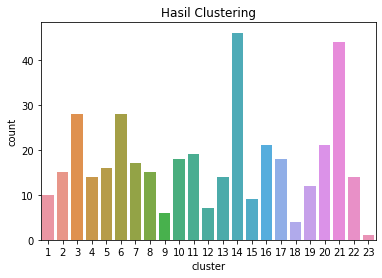

In [10]:
# Hasil Clustering
cluster_plot = sns.countplot(x="cluster", data=clusters_df).set_title('Hasil Clustering')

In [11]:
# save csv
clusters_df[['judul skripsi', 'cluster']].to_csv('cluster.csv')

### Validasi Menggunakan Silhouette Coefficient

Berikut adalah nilai silhouette berdasarkan Kaufman dan Rousseeuw :

jika: 0.7 < SC <= 1 ; maka ------------> Strong Stucture

jika: 0.5 < SC <= 0.7 ; maka ---------> Medium Structure

jika: 0.25 < SC <= 0.5 ; maka -------> Weak Structure

jika: SC <= 0.25 ; maka ----------------> No structure

In [12]:
global_s, local_s_df = sc.get_Silhouette(clusters_df)

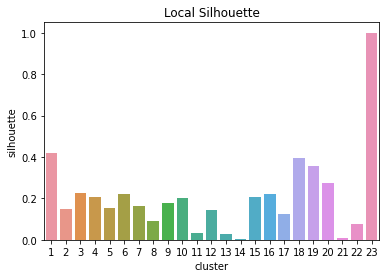

In [13]:
 # local silhouette -> nilai silhouette pada tiap cluster
local_s_plot = sns.barplot(x='cluster', y='silhouette', data=local_s_df).set_title('Local Silhouette')

In [14]:
# min local silhouette
print(' min local silhouette\n')
local_s_df.sort_values(by='silhouette').head(1) 

 min local silhouette



,cluster,silhouette
13,14,0.005982


In [15]:
# max local silhouette
print(' max local silhouette\n')
local_s_df.sort_values(by='silhouette', ascending=False).head(1)    

 max local silhouette



,cluster,silhouette
22,23,1.0


In [16]:
# global silhouette -> nilai silhouette pada keseluruhan cluster

print("\nGlobal Silhouette:",global_s)


Global Silhouette: 0.14710823219205557


### Waktu Eksekusi Program

In [17]:
finish = time.now()
print("total execution time\t:",(finish-start))

total execution time	: 0:42:00.723116
